In [1]:
# Import Packages
import os

from glob import glob
import scipy
import scipy.io as sio 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import xlrd

# Import Packages for Detrital Py
import detritalpy
import detritalpy.detritalFuncs as dFunc
import pathlib
import matplotlib
%matplotlib inline
%config InlineBackenc.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

print('detritalPy version: ',detritalpy.__version__)

detritalPy version:  1.3.23


# DetritalPy plots

In [2]:
# Set file path to DetritalPy input files
# DetrialPy needs you to type in the whole file path
pyplot_data_path = [
    r'E:\Users\libby\Documents\Ph.D\Manuscripts\2020_Wynny\2021-Wyn-Geochron-Manuscript-v2\2021-Wyn-DetritalPy\DetritalPy-WTT-Comparisons\2021-Wyn-DetritalPy-SpreadSheet-xls.xls']

main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(
    pyplot_data_path)

In [3]:
# Select Samples for DetritalPy Functions
#sampleList=[(['WYN17-1','WYN17-2']),'Wynyard Fm']
sampleList = [(['WYN17-1', 'WYN17-2'], 'Wynyard Fm')]

ages, errors, numGrains, labels = dFunc.sampleToData(
    sampleList, main_byid_df, sigma='1sigma')

In [4]:
def calcDFW(CDF, epsilon):
    """
    Computes the Kvoretsky-Kiefer-Wolfowitz inequality for a cumulative distribution function.
    
    Parameters
    ----------
    CDF : array of a cumulative distribution function for a single sample or sample group
    episilon : the half-width of the simultaneous confidence interval
    
    Returns
    -------
    DFWmin : array that defines the minimum bound on the Kvoretsky-Kiefer-Wolfowitz inequality
    DFWmax : that defines the maximum bound on the Kvoretsky-Kiefer-Wolfowitz inequality
    
    Notes
    -----
    Based on Anderson et al. (2018): Basin Research, v. 30, p. 132-147, doi: 10.1111/bre.12245
    """    
    DFWmin = CDF-epsilon
    DFWmax = CDF+epsilon
    DFWmin[DFWmin < 0] = 0
    DFWmax[DFWmax > 1] = 1
    
    return DFWmin, DFWmax

def CDFcalcAges(ages, x1=0, x2=4501, xdif=1):
    """
    Computes the CDF for an array of samples.
    
    Parameters
    ----------
    ages : array of ages, len(ages)=number of samples or sample groups
    x1 : (optional) beginning of range to compute CDF (default = 4500 Ma)
    x2 : (optional) end of range to compute CDF (default = 4500 Ma)
    xdif : (optional) bin size to compute CDF (default = 1 Ma)
    
    Returns
    -------
    CDF_age : array of ages that CDF is computed over    
    CDF : array of CDF functions
    
    Notes
    -----
    """
    CDF_age = np.arange(x1, x2+xdif, xdif)
    CDF = np.empty(shape=(len(ages),len(CDF_age)))
    for i in range(len(ages)):
        for j in range(len(CDF_age)):
            CDF[i][j] = np.sum(ages[i] <= CDF_age[j])
        CDF[i] = CDF[i]*1.0/len(ages[i])
    return CDF_age, CDF

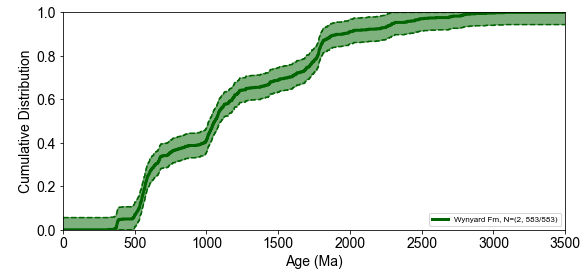

In [5]:
# Enter plot options below
whatToPlot = 'cumulative' # Options: cumulative, relative, or both
separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 3500
plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
w = 10 # width of the plot
c = 4 # height of CDF panel
h = 10 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

# Specify the interval (Myr) over which distributions are calculated
xdif = 1 # Note: an interval of 1 Myr is recommended

# Cumulative distribution options
plotCDF = True # Plot the CDF discretized at xdif interval
plotCPDP = False # Plot the cumulative PDP
plotCKDE = False # Plot the cumulative KDE
plotDKW = True # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if equals True (if separateSubplots is True)

plotKDE = False # Set to True if want to plot KDE
colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = True # Will color KDE according to age populations if set to True
bw = 10 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = False # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = False # Set to True to plot a histogram (only available when separateSubplots is True)
b = 10 # Specify the histogram bin size (Myr)

plotPIE = False # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
# E Aus Lachlan Origin Granitoids = 330 - 430; Hong et al 2017
# Recycled Mesoproterozoic Grains = 1300 - 1800; 
agebins = [0, 330, 430, 600, 700, 925, 1135, 1300, 1900, 3000, 4000]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown','yellow']

plotAgePeaks = False # Will identify and plot age peaks
agePeakOptions = ['KDE', 0.05, 5, 10, True] # [distType, threshold, minDist, minPeakSize, labels]

fig = dFunc.plotAll(sampleList, ages, errors, numGrains, labels, whatToPlot, separateSubplots, plotCDF, plotCPDP, plotCKDE, 
                    plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar, 
                    plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                    CDFlw=3, KDElw=1, PDPlw=1)


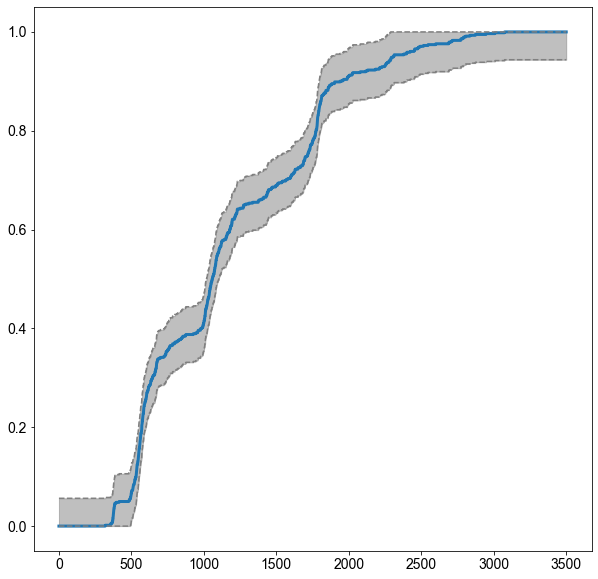

In [6]:
# For coloring by category
CDFlw=3

fig, ax1 = plt.subplots (figsize=(10, 10))

CDF_age, CDF = CDFcalcAges(ages=ages, x1=0, x2=3500, xdif=xdif)
for i in range(len(sampleList)):
    ax1.plot(CDF_age, CDF[i], alpha=1, lw=CDFlw, label= 'Wynyard')
    if plotDKW:
        alpha = 0.05 # Default is 95% confidence interval
        epsilon = np.empty(shape=(len(numGrains),1))
        for i in range(len(sampleList)):
            epsilon[i] = np.sqrt(np.log(2./alpha)/(2.*numGrains[i]))
        DFWmin, DFWmax = calcDFW(CDF[i], epsilon[i])
        ax1.plot(CDF_age, DFWmax, '--', color='grey')
        ax1.plot(CDF_age, DFWmin, '--', color='grey')
        ax1.fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha = 0.5)

# DZMix Imports

In [7]:
# Set working directory
# Enter the directory path on you computer where the '2021-Wyn-Geochron-Manuscript' folder is located
wd = os.getcwd()

# Set path to excel files
wd_path = wd
ratios_file_path = os.path.join(
    wd,"2021-DZMix-Models", "DZMix-StepWise", "stepwise-ratios.xls")

### Trial 1 Data Import

In [8]:
# Import Trial 1 (Non Step-wise) model results
percent_sample = 0.849
start_value = 0.0497

# Define folder paths
trial_1_path = os.path.join(wd,"2021-DZMix-Models", "2-DZMix-WTT-NoStep-430-1900")
# trial_1_kuiper_path = os.path.join(wd,"2021-DZMix-Model", "trial1", "kuiper-v")
# trial_1_xcorr_path = os.path.join(wd,"2021-DZMix-Model", "trial1", "x-corr")

## Import ks *.fig data
# Set working directory
os.chdir(trial_1_path)
# Open *fig file
ks_1 = sio.loadmat("2-DZMix-WTT-NoStep-430-1900-KS-D.fig",
                   squeeze_me=True, struct_as_record=False)
ks_1_hgS = ks_1['hgS_070000'].children
ks_1_legs = ks_1_hgS[1]
ks_1_hgS_xy = ks_1_hgS[0]
ks_1_hgS_xy = ks_1_hgS_xy.children
# Delete Target Sample CDF
ks_1_hgS_xy = np.delete(ks_1_hgS_xy,100)

## Import kuiper *.fig data
# Set working directory
os.chdir(trial_1_path)
# Open *fig file
kuiper_1 = sio.loadmat("2-DZMix-WTT-NoStep-430-1900-Kuiper-V.fig",
                   squeeze_me=True, struct_as_record=False)
kuiper_1_hgS = kuiper_1['hgS_070000'].children
kuiper_1_legs = kuiper_1_hgS[1]
kuiper_1_hgS_xy = kuiper_1_hgS[0]
kuiper_1_hgS_xy =kuiper_1_hgS_xy.children
# Delete Target Sample CDF
kuiper_1_hgS_xy = np.delete(kuiper_1_hgS_xy,100)


## Import cross correlation *.fig data
# Set working directory
os.chdir(trial_1_path)
# Open *fig file
xcorr_1 = sio.loadmat("2-DZMix-WTT-NoStep-430-1900-xcorr.fig",
                   squeeze_me=True, struct_as_record=False)
xcorr_1_hgS = xcorr_1['hgS_070000'].children
xcorr_1_legs = xcorr_1_hgS[1]
xcorr_1_hgS_xy = xcorr_1_hgS[0]
xcorr_1_hgS_xy = xcorr_1_hgS_xy.children

# Define Target KDE
xcorr_1_target_xy = xcorr_1_hgS_xy[100]
xcorr_xt = xcorr_1_target_xy.properties.XData
xcorr_yt = xcorr_1_target_xy.properties.YData

# Delete Target Sample KDE
xcorr_1_hgS_xy = np.delete(xcorr_1_hgS_xy,100)


(430.0, 1900.0)

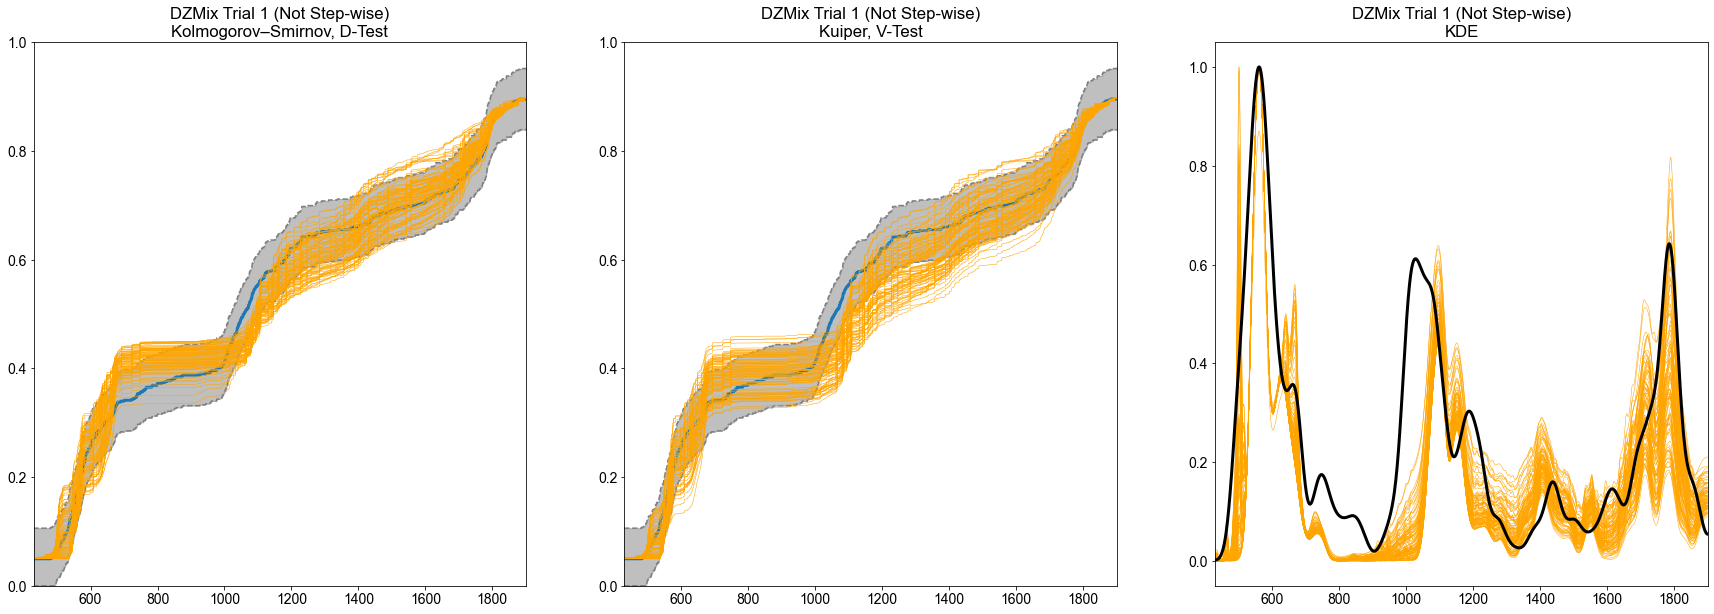

In [9]:
# DZMix Trial 1 Test Plots

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(30,10))

for i in range(len(sampleList)):
    ax1.plot(CDF_age, CDF[i], alpha=1, lw=CDFlw, label= 'Wynyard')
    ax2.plot(CDF_age, CDF[i], alpha=1, lw=CDFlw, label= 'Wynyard')
    if plotDKW:
        alpha = 0.05 # Default is 95% confidence interval
        epsilon = np.empty(shape=(len(numGrains),1))
        for i in range(len(sampleList)):
            epsilon[i] = np.sqrt(np.log(2./alpha)/(2.*numGrains[i]))
        DFWmin, DFWmax = calcDFW(CDF[i], epsilon[i])
        ax1.plot(CDF_age, DFWmax, '--', color='grey')
        ax1.plot(CDF_age, DFWmin, '--', color='grey')
        ax1.fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha = 0.5)
        ax2.plot(CDF_age, DFWmax, '--', color='grey')
        ax2.plot(CDF_age, DFWmin, '--', color='grey')
        ax2.fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha = 0.5)

# Sub-plot 4: Trial 1 KS D Test
percent_sample = 0.849
start_value = 0.0497
for line in ks_1_hgS_xy:
    if line.type == 'graph2d.lineseries':
        x = line.properties.XData
        y = line.properties.YData
        y = (y*percent_sample)+start_value
        ax1.plot(x, y, linewidth=0.5, color='orange')


# Sub-plot 5: Trial 1 Kuiper V Test
percent_sample = 0.849
start_value = 0.0497
for line in kuiper_1_hgS_xy:
    if line.type == 'graph2d.lineseries':
        x = line.properties.XData
        y = line.properties.YData
        y = (y*percent_sample)+start_value
        ax2.plot(x, y, linewidth=0.5, color='orange')


# Sub-plot 6: Trial 1 Cross-correlation
for line in xcorr_1_hgS_xy:
    if line.type == 'graph2d.lineseries':
        x = line.properties.XData
        y = line.properties.YData
        y_max = y.max(axis=0)
        y_norm = y/y_max
        ax3.plot(x, y_norm, linewidth=0.5, color='orange')

# Target Sample KDE
yt_max = xcorr_yt.max(axis=0)
yt_norm = xcorr_yt/yt_max
ax3.plot(xcorr_xt, yt_norm, linewidth=3, color='black')

# Format Plot 4 Area
agemin = 430
agemax=1900
ax1.set(title='DZMix Trial 1 (Not Step-wise)\nKolmogorov–Smirnov, D-Test')
ax1.set_xlim(agemin, agemax)
ax1.set_ylim(0, 1)
# Format Plot 5 Area
ax2.set(title='DZMix Trial 1 (Not Step-wise)\nKuiper, V-Test')
ax2.set_xlim(agemin, agemax)
ax2.set_ylim(0, 1)
# Format Plot 6 Area
ax3.set(title='DZMix Trial 1 (Not Step-wise)\nKDE')
ax3.set_xlim(agemin, agemax)

## DZMix Step-Wise Import from *.fig files

In [10]:
## K-S
# Get normalizing percentages
normal_param = pd.read_excel(ratios_file_path, sheet_name="sample_info")
sample_percent = normal_param['Percent Wynyard Sample'].tolist()
start_value = normal_param['Total Percent Start'].tolist()

# Define folder paths
step_ks_path = os.path.join(
    wd, "2021-DZMix-Models", "DZMix-StepWise", "plots", "ks-d")
step_kuiper_path = os.path.join(
    wd, "2021-DZMix-Models", "DZMix-StepWise", "plots", "kuiper-v")
step_xcorr_path = os.path.join(
    wd, "2021-DZMix-Models", "DZMix-StepWise", "plots", "x-corr")

# Import K-S CDF Curves
file_list = [os.path.basename(x)
             for x in glob(os.path.join(step_ks_path, "*"))]
#file_list = file_list.sort()
# Set working directory
os.chdir(step_ks_path)
# Open *fig file
ks_df = pd.DataFrame()
age_Ma = []
percent = []
run_count = []
for (fname, a_percent, a_value) in zip(file_list, sample_percent, start_value):
    run = 0
    temp = sio.loadmat(fname, squeeze_me=True, struct_as_record=False)
    temp_hgS = temp['hgS_070000'].children
    temp_legs = temp_hgS[1]
    temp_hgS_xy = temp_hgS[0]
    temp_hgS_xy = temp_hgS_xy.children
    # Delete Target Sample CDF
    temp_hgS_xy = np.delete(temp_hgS_xy, 100)
    # Make DataFrame
    for line in temp_hgS_xy:
        if line.type == 'graph2d.lineseries':
            x = line.properties.XData
            y = line.properties.YData
            y = (y*a_percent)+a_value
            run = run + 1
            age_Ma = np.append(age_Ma, x)
            percent = np.append(percent, y)
            # Make array for run number
            count = np.size(x,0)
            for i in range(count):
                run_count = np.append(run_count,run)

ks_df['age_Ma']=age_Ma
ks_df['cdf_value']=percent
run_count = run_count.astype(int)
ks_df['run'] = run_count

In [11]:
## Kuiper
# Get normalizing percentages
normal_param = pd.read_excel(ratios_file_path, sheet_name="sample_info")
sample_percent = normal_param['Percent Wynyard Sample'].tolist()
start_value = normal_param['Total Percent Start'].tolist()

# Import Kuiper CDF Curves
file_list = [os.path.basename(x)
             for x in glob(os.path.join(step_kuiper_path, "*"))]

# Set working directory
os.chdir(step_kuiper_path)
# Open *fig file
KUIPER_df = pd.DataFrame()
age_Ma = []
percent = []
run_count = []
for (fname, a_percent, a_value) in zip(file_list, sample_percent, start_value):
    run = 0
    temp = sio.loadmat(fname, squeeze_me=True, struct_as_record=False)
    temp_hgS = temp['hgS_070000'].children
    temp_legs = temp_hgS[1]
    temp_hgS_xy = temp_hgS[0]
    temp_hgS_xy = temp_hgS_xy.children
    # Delete Target Sample CDF
    temp_hgS_xy = np.delete(temp_hgS_xy, 100)
    # Make DataFrame
    for line in temp_hgS_xy:
        if line.type == 'graph2d.lineseries':
            x = line.properties.XData
            y = line.properties.YData
            y = (y*a_percent)+a_value
            run = run + 1
            age_Ma = np.append(age_Ma, x)
            percent = np.append(percent, y)
            # Make array for run number
            count = np.size(x,0)
            for i in range(count):
                run_count = np.append(run_count,run)

KUIPER_df['age_Ma']=age_Ma
KUIPER_df['cdf_value']=percent
run_count = run_count.astype(int)
KUIPER_df['run'] = run_count


In [12]:
# Cross- Correlation KDE
# Get normalizing percentages
normal_param = pd.read_excel(ratios_file_path, sheet_name="sample_info")
sample_percent = normal_param['Percent Wynyard Sample'].tolist()
start_value = normal_param['Total Percent Start'].tolist()

# Import Cross-correlation kde curves
file_list = [os.path.basename(x)
             for x in glob(os.path.join(step_xcorr_path, "*"))]

# Set working directory
os.chdir(step_xcorr_path)
# Blank arrays
XCORR_df = pd.DataFrame()
age_Ma = []
percent = []
run_count = []
y_line_max=[]

for (fname, a_percent, a_value) in zip(file_list, sample_percent, start_value):
    run = 0
    temp = sio.loadmat(fname, squeeze_me=True, struct_as_record=False)
    temp_hgS = temp['hgS_070000'].children
    temp_legs = temp_hgS[1]
    temp_hgS_xy = temp_hgS[0]
    temp_hgS_xy = temp_hgS_xy.children
    # Delete Target Sample CDF
    temp_hgS_xy = np.delete(temp_hgS_xy, 100)
    # Make DataFrame
    for line in temp_hgS_xy:
        if line.type == 'graph2d.lineseries':
            x = line.properties.XData
            y = line.properties.YData
            y_max = y.max(axis=0)
            y = y*a_percent
            run = run + 1
            age_Ma = np.append(age_Ma, x)
            percent = np.append(percent, y)
            y_line_max = np.append(y_line_max,y_max)
            # Make array for run number
            count = np.size(x,0)
            for i in range(count):
                run_count = np.append(run_count,run)


                
max_y = percent.max()
percent = percent/max_y
XCORR_df['age_Ma']=age_Ma
XCORR_df['kde_value']=percent
run_count = run_count.astype(int)
XCORR_df['run'] = run_count

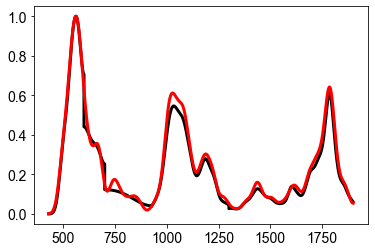

In [13]:
# Define target kde for step-wise x-correlation results
# Get normalizing percentages
normal_param = pd.read_excel(ratios_file_path, sheet_name="sample_info")
sample_percent = normal_param['Percent Wynyard Sample'].tolist()
start_value = normal_param['Total Percent Start'].tolist()

# Import Cross-correlation kde curves
file_list = [os.path.basename(x)
             for x in glob(os.path.join(step_xcorr_path, "*"))]

# Set working directory
os.chdir(step_xcorr_path)

# blank arrays
step_target_age_Ma = []
step_target_percent = []

for (fname, a_percent, a_value) in zip(file_list, sample_percent, start_value):
    # Open *fig file
    xcorr_step = sio.loadmat(fname, squeeze_me=True, struct_as_record=False)
    xcorr_step_hgS = xcorr_step['hgS_070000'].children
    xcorr_step_legs = xcorr_step_hgS[1]
    xcorr_step_hgS_xy = xcorr_step_hgS[0]
    xcorr_step_hgS_xy = xcorr_step_hgS_xy.children
    xcorr_step_target_xy = xcorr_step_hgS_xy[100]
    xcorr_step_xt = xcorr_step_target_xy.properties.XData
    xcorr_step_yt = xcorr_step_target_xy.properties.YData
    # Target Sample KDE
    yt_step_max = xcorr_step_yt.max(axis=0)
    yt_step_norm = xcorr_step_yt*a_percent
    # Append arrays
    step_target_age_Ma = np.append(step_target_age_Ma, xcorr_step_xt)
    step_target_percent = np.append(step_target_percent, yt_step_norm)

step_max_norm = step_target_percent.max(axis=0)
step_target_percent = step_target_percent/step_max_norm

# Target Sample KDE
fig, ax = plt.subplots()
ax.plot(step_target_age_Ma, step_target_percent, linewidth=3, color='black')

# Target Sample KDE
yt_max = xcorr_yt.max(axis=0)
yt_norm = xcorr_yt/yt_max
ax.plot(xcorr_xt, yt_norm, linewidth=3, color='red')

(430.0, 1900.0)

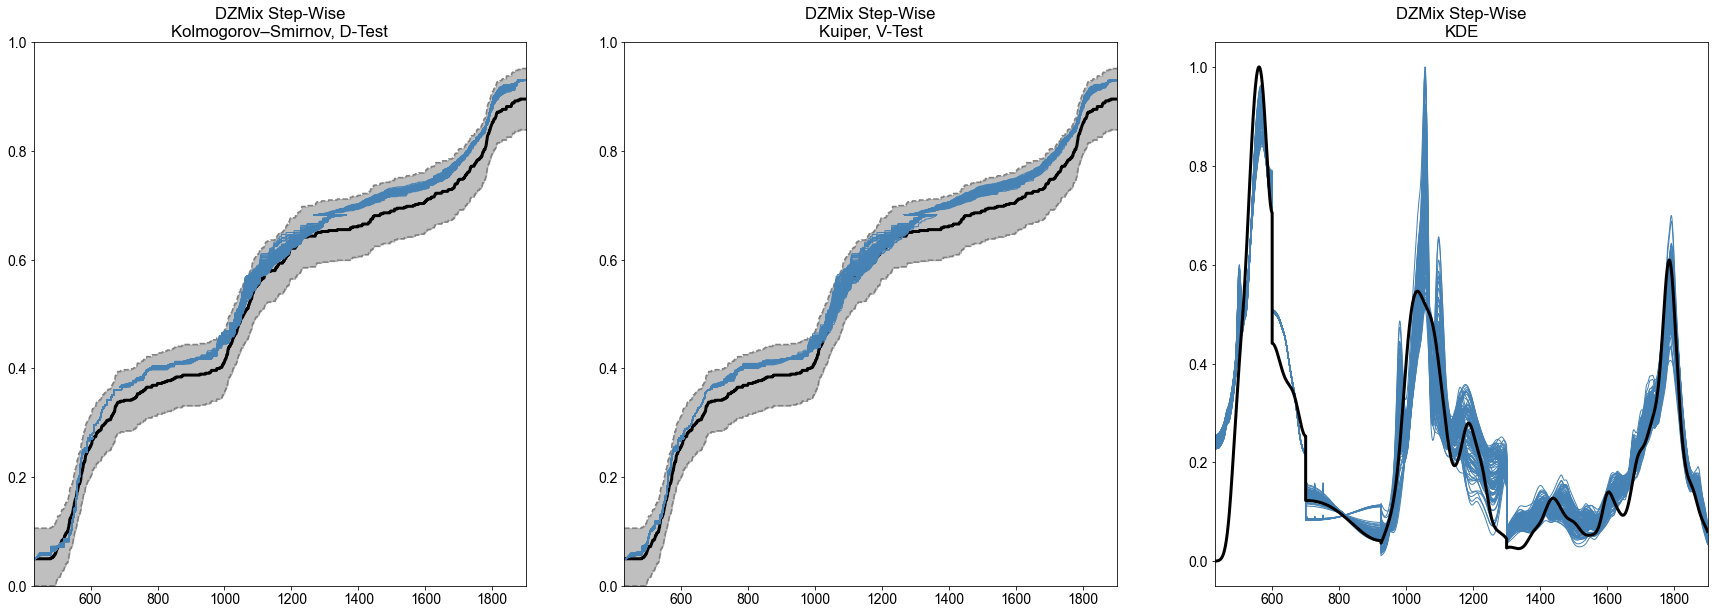

In [14]:
# # test = percent.max()
# # percent = percent*test

# # XCORR_df['age_Ma']=age_Ma
# # XCORR_df['kde_value']=percent
# # run_count = run_count.astype(int)
# # XCORR_df['run'] = run_count

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
for i in range(len(sampleList)):
    ax1.plot(CDF_age, CDF[i], alpha=1, lw=CDFlw,
             color='black', label='Wynyard')
    ax2.plot(CDF_age, CDF[i], alpha=1, lw=CDFlw,
             color='black', label='Wynyard')
    if plotDKW:
        alpha = 0.05  # Default is 95% confidence interval
        epsilon = np.empty(shape=(len(numGrains), 1))
        for i in range(len(sampleList)):
            epsilon[i] = np.sqrt(np.log(2./alpha)/(2.*numGrains[i]))
        DFWmin, DFWmax = calcDFW(CDF[i], epsilon[i])
        ax1.plot(CDF_age, DFWmax, '--', color='grey')
        ax1.plot(CDF_age, DFWmin, '--', color='grey')
        ax1.fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha=0.5)
        ax2.plot(CDF_age, DFWmax, '--', color='grey')
        ax2.plot(CDF_age, DFWmin, '--', color='grey')
        ax2.fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha=0.5)

# Sub-plot 1: KS V-test CDF
# Using Fig Values
ks_df_run = ks_df.set_index('run')
run_names = ks_df['run'].unique()
for a_run in run_names:
    temp_boolean = ks_df["run"] == a_run
    temp_run = ks_df[temp_boolean]
    ax1.plot(temp_run['age_Ma'],
             temp_run['cdf_value'],
             color='steelblue',
             linewidth=1)

# Sub-plot 2: Kuiper D-test CDF
# Using Fig Values
kuiper_df_run = KUIPER_df.set_index('run')
run_names = KUIPER_df['run'].unique()
for a_run in run_names:
    temp_boolean = KUIPER_df["run"] == a_run
    temp_run = KUIPER_df[temp_boolean]
    ax2.plot(temp_run['age_Ma'],
             temp_run['cdf_value'],
             color='steelblue',
             linewidth=1)

# Sub-plot 3: Step-wise Cross-Correlation KDE
# Using Fig Values
xcorr_df_run = XCORR_df.set_index('run')
run_names = XCORR_df['run'].unique()
for a_run in run_names:
    temp_boolean = XCORR_df["run"] == a_run
    temp_run = XCORR_df[temp_boolean]
    ax3.plot(temp_run['age_Ma'],
             temp_run['kde_value'],
             color='steelblue',
             linewidth=1)

# Target Sample KDE
ax3.plot(step_target_age_Ma, step_target_percent, linewidth=3, color='black')

# Format Plot 4 Area
agemin = 430
agemax=1900
ax1.set(title='DZMix Step-Wise\nKolmogorov–Smirnov, D-Test')
ax1.set_xlim(agemin, agemax)
ax1.set_ylim(0, 1)
# Format Plot 5 Area
ax2.set(title='DZMix Step-Wise\nKuiper, V-Test')
ax2.set_xlim(agemin, agemax)
ax2.set_ylim(0, 1)
# Format Plot 6 Area
ax3.set(title='DZMix Step-Wise\nKDE')
ax3.set_xlim(agemin, agemax)

## NLS Model Results

In [53]:
nls_path = os.path.join(wd,"2021-NLS-Model","model_results_adaptive_kde.csv")
nls_pd = pd.read_csv(nls_path)
nls_pd = nls_pd.set_index('age_Ma')
nls_model_kdes = nls_pd.filter(regex='pred')

nls_path2 = os.path.join(wd,"2021-NLS-Model","nls_cdf_approximation_csv.csv")
nls_pd_cdf = pd.read_csv(nls_path2)

(430.0, 1900.0)

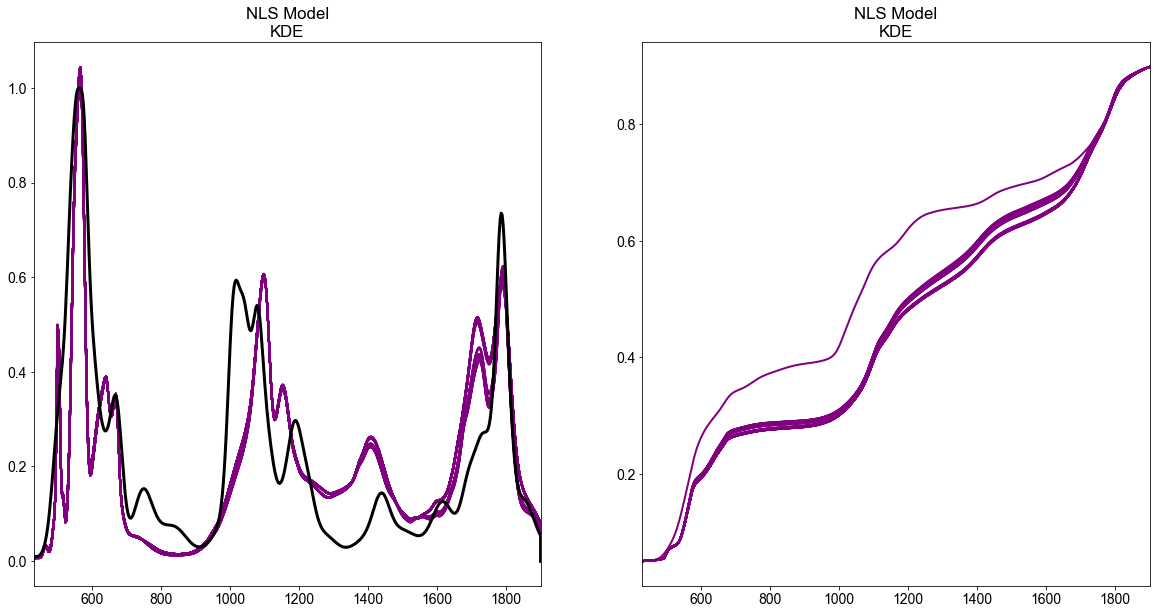

In [54]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
for col in nls_pd_cdf.columns[1:]:
    ax2.plot(nls_pd_cdf['age_Ma'],
              nls_pd_cdf[col],
              linewidth=2,
              color='purple')

# Sub-plot 9: NLS Model KDE
temp_df9_pred = nls_model_kdes.reset_index()
for col in temp_df9_pred.columns[1:]:
    ax1.plot(temp_df9_pred['age_Ma'],
              temp_df9[col],
              linewidth=2,
              color='purple')

temp_df9= nls_pd.reset_index()
ax1.plot(temp_df9['age_Ma'],
              temp_df9['target_kde'],
              linewidth=3,
              color='black')

# Format Plot 9 Area
ax1.set(title='NLS Model\nKDE')
ax1.set_xlim(agemin, agemax)

# Format Plot 9 Area
ax2.set(title='NLS Model\nKDE')
ax2.set_xlim(agemin, agemax)

# Plot

(430.0, 1900.0)

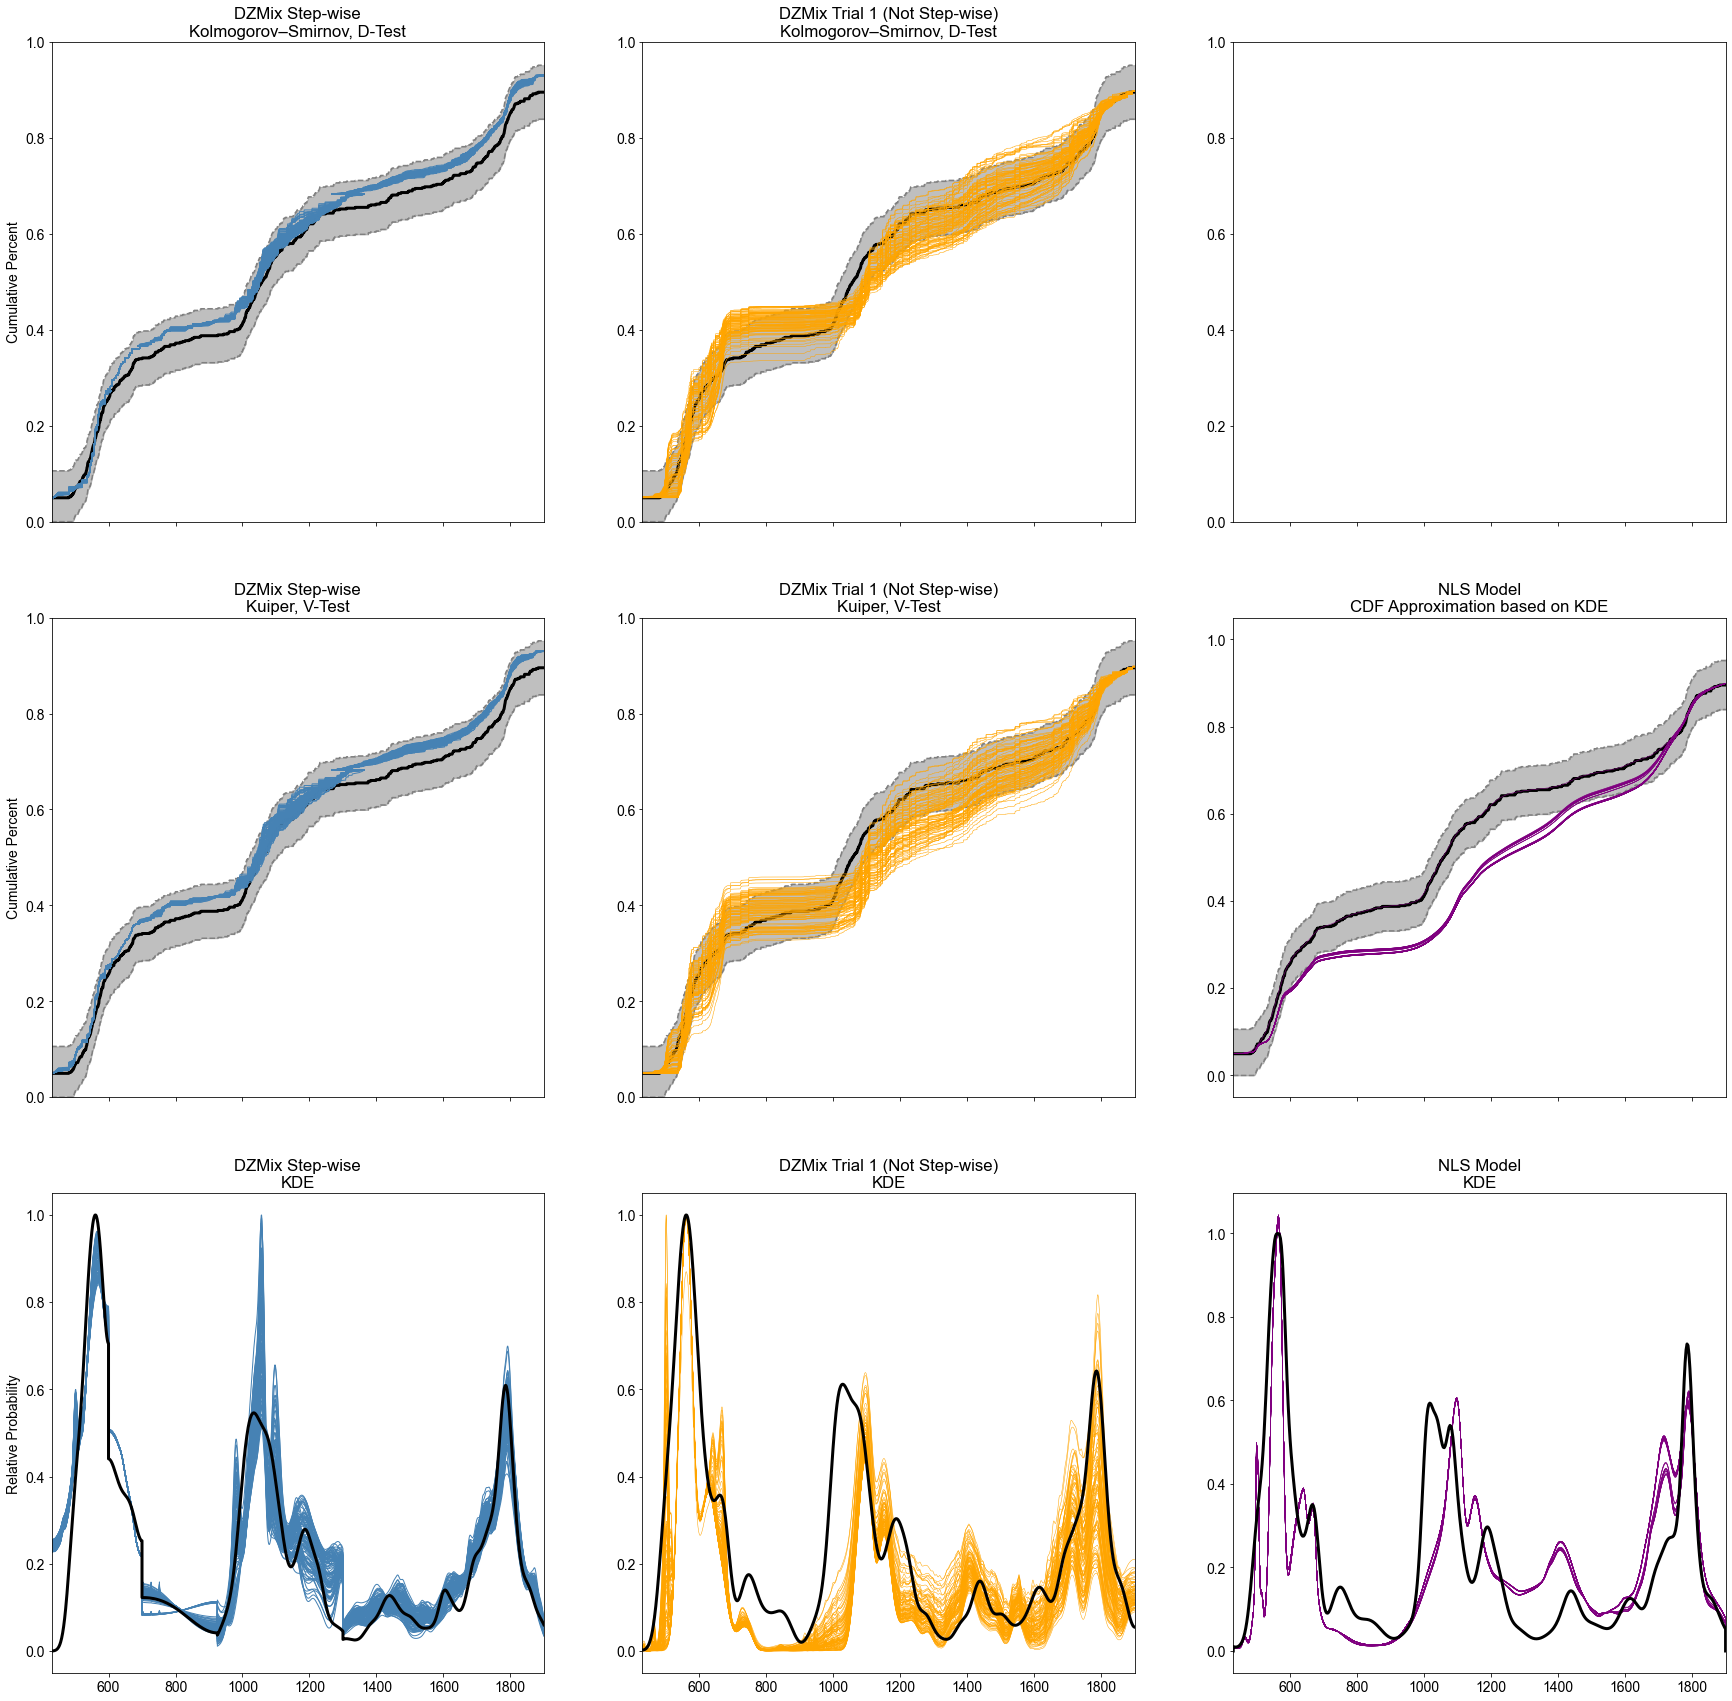

In [56]:
fig, ax = plt.subplots(3, 3, sharex='col', figsize=(30, 30))

# Wynyard Fm CDF
CDF_age, CDF = CDFcalcAges(ages=ages, x1=0, x2=3500, xdif=xdif)
for i in range(len(sampleList)):
    ax[0, 0].plot(CDF_age, CDF[i], alpha=1, lw=CDFlw,
                  label='Wynyard', color='black')
    ax[1, 0].plot(CDF_age, CDF[i], alpha=1, lw=CDFlw,
                  label='Wynyard', color='black')
    ax[1, 1].plot(CDF_age, CDF[i], alpha=1, lw=CDFlw,
                  label='Wynyard', color='black')
    ax[0, 1].plot(CDF_age, CDF[i], alpha=1, lw=CDFlw,
                  label='Wynyard', color='black')
    ax[1, 2].plot(CDF_age, CDF[i], alpha=1, lw=CDFlw,
                  label='Wynyard', color='black')
    if plotDKW:
        alpha = 0.05  # Default is 95% confidence interval
        epsilon = np.empty(shape=(len(numGrains), 1))
        for i in range(len(sampleList)):
            epsilon[i] = np.sqrt(np.log(2./alpha)/(2.*numGrains[i]))
        DFWmin, DFWmax = calcDFW(CDF[i], epsilon[i])
        ax[0, 0].plot(DFWmax, '--', color='grey')
        ax[0, 0].plot(DFWmin, '--', color='grey')
        ax[0, 0].fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha=0.5)
        ax[1, 0].plot(DFWmax, '--', color='grey')
        ax[1, 0].plot(DFWmin, '--', color='grey')
        ax[1, 0].fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha=0.5)
        ax[1, 1].plot(DFWmax, '--', color='grey')
        ax[1, 1].plot(DFWmin, '--', color='grey')
        ax[1, 1].fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha=0.5)
        ax[0, 1].plot(DFWmax, '--', color='grey')
        ax[0, 1].plot(DFWmin, '--', color='grey')
        ax[0, 1].fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha=0.5)
        ax[1, 2].plot(DFWmax, '--', color='grey')
        ax[1, 2].plot(DFWmin, '--', color='grey')
        ax[1, 2].fill_between(CDF_age, DFWmax, DFWmin, color='grey', alpha=0.5)


## Sub-plot 1: KS V-test CDF
# Using Excel values
# model_runs = KS_df.columns.tolist()
# temp_df = KS_df.reset_index()
# for a_run in model_runs:
#     ax[0, 0].plot(temp_df['age_Ma'],
#                   temp_df[a_run],
#                   color='powderblue',
#                   linewidth=0.5)

# temp_df = KS_mean.reset_index()
# ax[0, 0].plot(temp_df['age_Ma'],
#               temp_df['mean'],
#               color='steelblue',
#               linewidth=2)

# Using Fig Values
ks_df_run = ks_df.set_index('run')
run_names = ks_df['run'].unique()
for a_run in run_names:
    temp_boolean = ks_df["run"] == a_run
    temp_run = ks_df[temp_boolean]
    ax[0,0].plot(temp_run['age_Ma'],
            temp_run['cdf_value'],
            color='steelblue',
            linewidth=1)

# Sub-plot 2: Kuiper D-test CDF
# # Using Excel Values
# model_runs = kuiper_df.columns.tolist()
# temp_df2 = kuiper_df.reset_index()
# for a_run in model_runs:
#     ax[1, 0].plot(temp_df2['age_Ma'],
#                   temp_df2[a_run],
#                   color='powderblue',
#                   linewidth=0.5)

# temp_df2 = kuiper_mean.reset_index()
# ax[1, 0].plot(temp_df2['age_Ma'],
#               temp_df2['mean'],
#               color='steelblue',
#               linewidth=2)

# Using Fig Values
kuiper_df_run = KUIPER_df.set_index('run')
run_names = KUIPER_df['run'].unique()
for a_run in run_names:
    temp_boolean = KUIPER_df["run"] == a_run
    temp_run = KUIPER_df[temp_boolean]
    ax[1,0].plot(temp_run['age_Ma'],
            temp_run['cdf_value'],
            color='steelblue',
            linewidth=1)

# Sub-plot 3: Step-wise Cross-Correlation KDE
# for (fname, a_percent) in zip(xcorr_sheet_names,sample_percent):
#     df = pd.read_excel(xcorr_file_path, sheet_name=fname)
#     df = df.set_index('age_Ma')
#     df_max = df.max().max()
#     df = ((df)/df_max)*a_percent
#     #xcorr_df = xcorr_df.append(df)
#     model_runs = df.columns.tolist()
#     temp_df3 = df.reset_index()
#     for a_run in model_runs:
#         ax[2, 0].plot(temp_df3['age_Ma'],
#                   temp_df3[a_run],
#                   color='powderblue',
#                   linewidth=0.5)

# Using Fig Values
xcorr_df_run = XCORR_df.set_index('run')
run_names = XCORR_df['run'].unique()
for a_run in run_names:
    temp_boolean = XCORR_df["run"] == a_run
    temp_run = XCORR_df[temp_boolean]
    ax[2,0].plot(temp_run['age_Ma'],
            temp_run['kde_value'],
            color='steelblue',
            linewidth=1)
        
# Target Sample KDE
ax[2,0].plot(step_target_age_Ma, step_target_percent, linewidth=3, color='black')


# Sub-plot 4: Trial 1 KS D Test
percent_sample = 0.849
start_value = 0.0497
for line in ks_1_hgS_xy:
    if line.type == 'graph2d.lineseries':
        x = line.properties.XData
        y = line.properties.YData
        y = (y*percent_sample)+start_value
        ax[0, 1].plot(x, y, linewidth=0.5, color='orange')


# Sub-plot 5: Trial 1 Kuiper V Test
percent_sample = 0.849
start_value = 0.0497
for line in kuiper_1_hgS_xy:
    if line.type == 'graph2d.lineseries':
        x = line.properties.XData
        y = line.properties.YData
        y = (y*percent_sample)+start_value
        ax[1, 1].plot(x, y, linewidth=0.5, color='orange')


# Sub-plot 6: Trial 1 Cross-correlation
for line in xcorr_1_hgS_xy:
    if line.type == 'graph2d.lineseries':
        x = line.properties.XData
        y = line.properties.YData
        y_max = y.max(axis=0)
        y_norm = y/y_max
        ax[2, 1].plot(x, y_norm, linewidth=0.5, color='orange')

# Target Sample KDE
yt_max = xcorr_yt.max(axis=0)
yt_norm = xcorr_yt/yt_max
ax[2, 1].plot(xcorr_xt, yt_norm, linewidth=3, color='black')

# Sub-plot 7: Blank

# Sub-plot 8: NLS CDF approximation
for col in nls_pd_cdf.columns[1:]:
    ax[1,2].plot(nls_pd_cdf['age_Ma'],
              nls_pd_cdf[col],
              linewidth=0.5,
              color='purple')


# Sub-plot 9: NLS Model KDE
temp_df9_pred = nls_model_kdes.reset_index()
for col in temp_df9_pred.columns[1:]:
    ax[2,2].plot(temp_df9_pred['age_Ma'],
              temp_df9[col],
              linewidth=0.5,
              color='purple')

temp_df9= nls_pd.reset_index()
ax[2,2].plot(temp_df9['age_Ma'],
              temp_df9['target_kde'],
              linewidth=3,
              color='black')


# Plot Area Formatting
agemin = 430
agemax = 1900
# Format Plot 1 Area
ax[0, 0].set(ylabel='Cumulative Percent',
             title='DZMix Step-wise\nKolmogorov–Smirnov, D-Test')
ax[0, 0].set_xlim(agemin, agemax)
ax[0, 0].set_ylim(0, 1)
# Format Plot 2 Area
ax[1, 0].set(ylabel='Cumulative Percent',
             title='DZMix Step-wise\nKuiper, V-Test')
ax[1, 0].set_xlim(agemin, agemax)
ax[1, 0].set_ylim(0, 1)
# Format Plot 3 Area
ax[2, 0].set(ylabel='Relative Probability',
             title='DZMix Step-wise\nKDE')
ax[2, 0].set_xlim(agemin, agemax)
# Format Plot 4 Area
ax[0, 1].set(title='DZMix Trial 1 (Not Step-wise)\nKolmogorov–Smirnov, D-Test')
ax[0, 1].set_xlim(agemin, agemax)
ax[0, 1].set_ylim(0, 1)
# Format Plot 5 Area
ax[1, 1].set(title='DZMix Trial 1 (Not Step-wise)\nKuiper, V-Test')
ax[1, 1].set_xlim(agemin, agemax)
ax[1, 1].set_ylim(0, 1)
# Format Plot 6 Area
ax[2, 1].set(title='DZMix Trial 1 (Not Step-wise)\nKDE')
ax[2, 1].set_xlim(agemin, agemax)
# Format Plot 7 Area
# Format Plot 8 Area
ax[1, 2].set(title='NLS Model\nCDF Approximation based on KDE')
ax[1, 2].set_xlim(agemin, agemax)
# Format Plot 9 Area
ax[2, 2].set(title='NLS Model\nKDE')
ax[2, 2].set_xlim(agemin, agemax)